Mounted at /content/drive


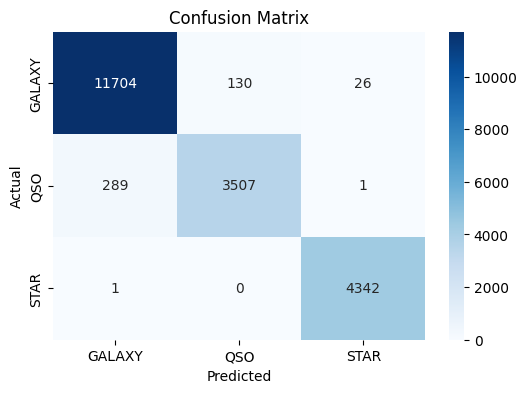

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11860
         QSO       0.96      0.92      0.94      3797
        STAR       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [1]:
# ========== 1. IMPORT LIBRARIES ==========
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 2. MOUNT GOOGLE DRIVE ==========
drive.mount('/content/drive')

# ========== 3. LOAD THE DATASET ==========
file_path = "/content/drive/MyDrive/MLAssignment/star_classification.csv"
df = pd.read_csv(file_path)

# ========== 4. DROP IDENTIFIER COLUMNS ==========
df.drop(columns=[
    "obj_ID", "spec_obj_ID", "run_ID", "rerun_ID", "cam_col",
    "field_ID", "plate", "MJD", "fiber_ID"
], inplace=True)

# ========== 5. ENCODE TARGET VARIABLE ==========
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # GALAXY=0, QSO=1, STAR=2

# ========== 6. SPLIT FEATURES & TARGET ==========
X = df.drop(columns=['class'])
y = df['class']

# ========== 7. SCALE FEATURES ==========
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ========== 8. TRAIN-TEST SPLIT ==========
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ========== 9. TRAIN CLASSIFIER ==========
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ========== 10. PREDICT & EVALUATE ==========
y_pred = clf.predict(X_test)

# CONFUSION MATRIX
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# CLASSIFICATION REPORT
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
